# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 4 - KMeans Clustering ##
![imdb_movie.png](https://fluentcrm.com/wp-content/webp-express/webp-images/doc-root/wp-content/uploads/2023/03/What-is-Market-Segmentation-X-Types-Examples-and-Benefits-1-1536x804.jpg.webp)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import seaborn as sns

# **Introduction**

In this lab, we will implement a K-Means Clustering algorithm to help segment activity mix data, which is essential for analyzing college student behavior. For this lab, we will use a simple dataset consisting of 420 data samples with nine different attributes (excluding StudentID): Program, Residence, Year, GPA, LibraryVisitsPerWeek, NightCanteenSpendHKD, SportsMinutesPerWeek, LectureAbsencesPerMonth, SocialEventsPerMonth.

The lab consists of 6 tasks, which will be explained in greater detail as you follow the notebook.
1. Data Preprocessing (2 Tasks)
2. Dimensionality Reduction (2 Tasks)
3. K-Means Clustering (2 Tasks)



## Preparing the Dataset

Run the code cells below to attain a brief understanding of your dataset. You do not have any tasks in this section. Note, you need to upload your csv file to Google Colab in order for the cells to run successfully.





In [ ]:
if __name__ == '__main__':
  activity_data = pd.read_csv("activity_mix_public.csv")
  display(activity_data.head())

,StudentID,Program,Residence,Year,GPA,LibraryVisitsPerWeek,NightCanteenSpendHKD,SportsMinutesPerWeek,LectureAbsencesPerMonth,SocialEventsPerMonth
0,1,MATH,UHall,UG2,2.895589,6.424748,119.679999,68.214511,2.264957,0.856451
1,2,COMP,Village,UG4,3.310852,2.868237,94.259593,110.424959,2.578624,1.255130
2,3,MATH,SKL,UG1,2.810473,4.697048,104.001771,107.042501,1.930147,2.087719
3,4,CIVL,Village,UG3,2.890133,3.962744,189.295291,63.863185,2.861109,3.742620
4,5,COMP,Village,UG2,3.279441,5.376956,55.882816,74.700092,3.043603,2.714025


In [ ]:
if __name__ == '__main__':
  activity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   StudentID                420 non-null    int64  
 1   Program                  420 non-null    object 
 2   Residence                420 non-null    object 
 3   Year                     420 non-null    object 
 4   GPA                      420 non-null    float64
 5   LibraryVisitsPerWeek     420 non-null    float64
 6   NightCanteenSpendHKD     420 non-null    float64
 7   SportsMinutesPerWeek     420 non-null    float64
 8   LectureAbsencesPerMonth  420 non-null    float64
 9   SocialEventsPerMonth     420 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 32.9+ KB


In [ ]:
if __name__ == '__main__':
  display(activity_data.describe())

,StudentID,GPA,LibraryVisitsPerWeek,NightCanteenSpendHKD,SportsMinutesPerWeek,LectureAbsencesPerMonth,SocialEventsPerMonth
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,210.500000,3.246403,5.551915,115.322827,85.689507,1.538084,2.877879
std,121.387808,0.360197,2.830822,53.554490,44.426038,1.156009,1.752756
min,1.000000,2.383130,0.000000,0.000000,0.000000,0.000000,0.000000
25%,105.750000,3.007755,3.657097,76.267099,52.055396,0.655583,1.570049
50%,210.500000,3.237576,5.631993,112.151085,86.196456,1.285150,2.620125
75%,315.250000,3.514233,7.268240,150.436613,119.589239,2.280713,4.168210
max,420.000000,4.000000,13.407766,263.634927,209.005850,5.497902,7.424957


## Data Preprocessing (2 Tasks)

Before applying K-Means clustering, it is essential to process the data to ensure meaningful results. In this lab, we will perform 2 key preprocessing steps:
1. Label Encoding (Task 1): As shown in the cells above, there are three categorical variables (Program, Residence, Year). We need to assign an integer value to this variable for our K-Means algorithm to function correctly.
2. Standard Scaling (Task 2): Since K-Means is a distance-based algorithm, it causes features with larger ranges to introduce bias into the algorithm. As such, we need to scale all our features (except the three categorical variables) to have a mean of 0 and a standard deviation of 1.

sklearn preprocessing documentation: https://scikit-learn.org/stable/modules/preprocessing.html

Write in the code cells below to complete the appropriate functions. Please read lab4_review for an overview of Pandas dataframes.



In [ ]:
def encode_data(df):
  # Task 1: Encode data of a specific column in the dataframe.
  ###### TO DO ######
  df_encoded = df.copy()
  for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":
      encoder = LabelEncoder()
      df_encoded[col] = encoder.fit_transform(df_encoded[col])

  ###################

  return df_encoded

In [ ]:
def standard_scaler(df):
  # Task 2: Perform standard scaling on the dataframe.
  # Note that we do NOT need to scale the first 3 columns.
  ###### TO DO ######
  for col in df.columns[3:]:
    m = df[col].mean()
    std = df[col].std()
    if std != 0:
        df[col] = (df[col] - m) / std
    else:
      df[col] = 0

  ###################

  return df

In [ ]:
if __name__ == '__main__':
  activity_data = activity_data.drop('StudentID', axis=1, errors='ignore')
  activity_data = encode_data(activity_data)
  activity_data = standard_scaler(activity_data)

  display(activity_data.head())

,Program,Residence,Year,GPA,LibraryVisitsPerWeek,NightCanteenSpendHKD,SportsMinutesPerWeek,LectureAbsencesPerMonth,SocialEventsPerMonth
0,4,2,1,-0.973951,0.308332,0.081360,-0.393350,0.628778,-1.153286
1,2,3,3,0.178927,-0.948020,-0.393305,0.556778,0.900114,-0.925827
2,4,1,0,-1.210254,-0.301985,-0.211393,0.480641,0.339152,-0.450810
3,1,3,2,-0.989096,-0.561381,1.381256,-0.491296,1.144477,0.493361
4,2,3,1,0.091722,-0.061805,-1.109898,-0.247364,1.302342,-0.093483


## Dimensionality Reduction (2 Tasks)

As you have noticed, our dataset contains a total of 9 attributes (excluding StudentID). To improve clustering performance and visualization, we can apply Principal Component Analysis (PCA) to reduce the dimensionality of our dataset, while retaining most of its underlying information.

PCA is a popular technique used to reduce the number of features while preserving their information (variance). There are 2 major steps to PCA:

1. Identifying new principal components (or new axes) that capture information (variance).
2. Projecting our dataset onto these new axes or components.

The tasks below will help you carry out PCA on our dataset.

1. `calculate_cumulative_variance(data)` (Task 3): We need to determine how many principal components (axes) are needed to capture a significant portion of the data's variability (at least 80%, ideally 90-95%).
2. `run_PCA(data, num_clusters)` (Task 4): Fit and transform our data (project our data) to the new components.

sklearn pca documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Hints: search for the keyword "variance" in the pca documentation.


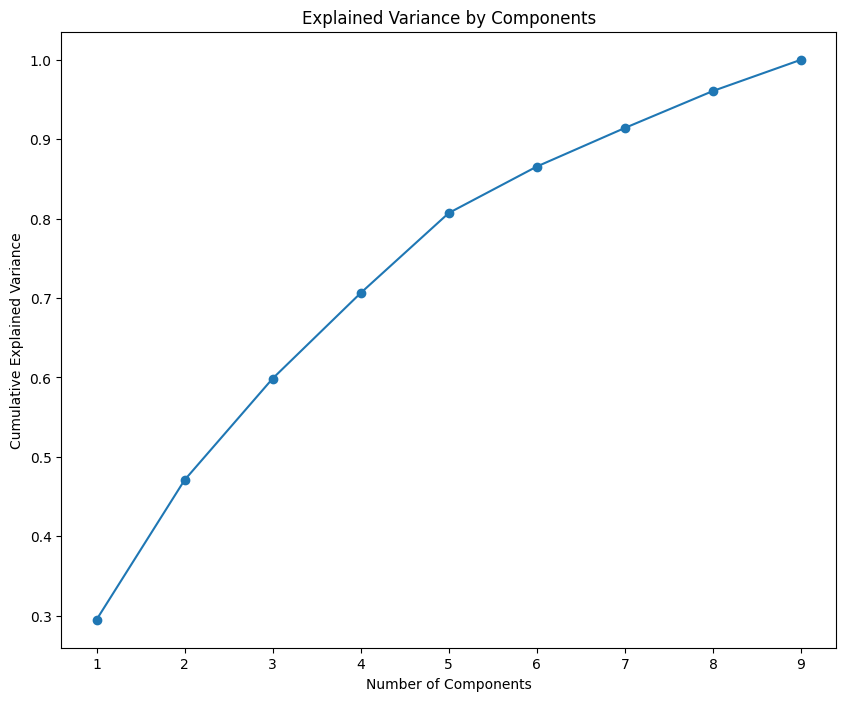

In [ ]:
def calculate_cumulative_variance(data):
  # Task 3: Follow the steps below to complete the function.
  ###### TO DO ######

  # Create our PCA object and fit it.
  pca = PCA()
  pca.fit(data)

  # calculate how much variance is explained by each component and its cumulative sum.
  # Hint: refer to documentation.
  cumulative_variance = pca.explained_variance_ratio_.cumsum()

  ###################

  return cumulative_variance

if __name__ == '__main__':
  cumulative_variance = calculate_cumulative_variance(activity_data)

  plt.figure(figsize=(10, 8))
  plt.plot(range(1, 10), cumulative_variance, marker='o')
  plt.title("Explained Variance by Components")
  plt.xlabel("Number of Components")
  plt.ylabel("Cumulative Explained Variance")
  plt.show()

Now that we have a graph of cumulative explained variance across the number of components, we need to decide the number of components to use in our final PCA.

The general rule of thumb is to use the minimum number of components that capture at least 80% of the data. In our case, this number is 5.


In [ ]:
def run_PCA(data, n_components):
  # Task 4: Create a PCA object and fit to the data.
  ###### TO DO ######
  pca = PCA(n_components = n_components)
  pca.fit(data)
  data_new = pca.transform(data)

  ###################

  return data_new

if __name__ == '__main__':
  data_new = run_PCA(activity_data, 5)
  display(data_new)

array([[ 0.27818011,  1.1787678 ,  0.31738816, -1.22844645, -0.43675572],
       [ 0.0945539 , -0.01774824,  1.69243485, -0.6746053 ,  1.31798056],
       [ 0.25327525,  0.89663288, -0.65247477, -0.98725775, -1.69202778],
       ...,
       [ 1.53445664,  1.01189735,  1.37560532,  1.709841  , -0.74330479],
       [ 0.87441482,  1.26872087,  0.50650727, -2.42148185,  1.01941431],
       [ 0.42606795, -0.41056454,  0.64612206, -0.37531701,  0.33061874]])

## K-Means Clustering (2 Tasks)

Once the data is preprocessed and the number of components has been calculated using PCA, we can finally apply K-Means to group similar students based on their features.

You need to complete the 3 functions below to continue with the assignment.

1. `euclidean_distance(a, b)` (Task 5.1): calculate the Euclidean distance between 2 data points (each data point is 2-dimensional).
2. `hamming_distance(a, b)` (Task 5.2): calculate the Hamming distance between 2 data points (each data point is 2-dimensional).
3. `kmeans_clustering()` (Task 6): calculate the new centroids using k-means/k-modes clustering (use `mean` to update centroids when `distance='euclidean'` and `stats.mode` when `distance='hamming'`). You will need to use the two functions written in Task 5 and implement a switch of different distance functions.



Documentation:
1. https://numpy.org/doc/2.2/reference/routines.sort.html
2. https://numpy.org/doc/2.1/reference/random/generated/numpy.random.choice.html
3. https://docs.scipy.org/doc//scipy-1.16.2/reference/generated/scipy.stats.mode.html

Complete the functions below to proceed with the lab assignment.

In [ ]:
def euclidean_distance(a, b):
    # Task 5.1: calculate the distance between 2 data points.
    # We have initialized the 2 data point arrays for you.
    # Should return a 1-D NumPy array
    a = np.atleast_2d(a)
    b = np.atleast_2d(b)

    ###### TO DO ######
    distance = np.sqrt(np.sum((a - b) ** 2, axis=1))

    ###################

    return distance


In [ ]:
def hamming_distance(a, b):
    # Task 5.2: calculate the Hamming distance between 2 data points.
    # We have initialized the 2 data point arrays for you.
    # Should return a 1-D NumPy array
    a = np.atleast_2d(a)
    b = np.atleast_2d(b)

    ###### TO DO ######
    distance = np.sum(a != b, axis=1)
    ###################

    return distance

In [ ]:
def kmeans_clustering(data, clusters, max_iters=50, rand_state=42, distance='euclidean'):
    # Task 6: calculate new centroids using kmeans clustering.
    # For simplicity, no need to recompute labels once after the last centroid update.

    # Parameter Definitions:
    # 1. data: the dataset to run the algorithm on
    # 2. clusters: the number of clusters to build.
    # 3. max_iters: the number of iterations to the run the algorithm for.
    # 4. rand_state: random state to maintain reproducibility.
    np.random.seed(rand_state)
    data = np.asarray(data)
    n_samples, n_features = data.shape

    # Step 1: Randomly initialize centroids
    centroids = data[np.random.choice(n_samples, clusters, replace=False)]

    ###### TO DO ######

    for _ in range(max_iters):
        # Step 2: Assign each point to the nearest centroid
        labels = np.empty(n_samples, dtype=int)
        for i, point in enumerate(data):
            if distance == 'euclidean':
                dists = [float(euclidean_distance(point, c)[0]) for c in centroids]
            elif distance == 'hamming':
                dists = [float(hamming_distance(point, c)[0]) for c in centroids]
            else:
                raise NotImplementedError(f"Unknown distance: {distance}")
            labels[i] = int(np.argmin(dists))

        # Step 3: Update centroids
        # euclidean -> mean
        # hamming -> stats.mode (majority category)
        new_centroids = []
        for k in range(clusters):
            members = data[labels == k]

            if distance == 'euclidean':
                new_centroids.append(members.mean(axis=0))
            elif distance == 'hamming':
                mr = stats.mode(members, axis=0, keepdims=False)
                new_centroids.append(np.asarray(mr.mode, dtype=members.dtype))

        centroids = new_centroids

    ###### TO DO ######

    return {'centroids': centroids, 'labels': labels}

Let's apply K-Means with `distance='euclidean'` to group similar students using the PCA components.

In [ ]:
if __name__ == '__main__':
  result = kmeans_clustering(data_new, 2, distance='euclidean')

  final_data_1 = pd.concat([activity_data, pd.DataFrame(data_new)], axis=1)
  final_data_1.columns.values[-5:] = ['PCA Component 1', 'PCA Component 2', 'PCA Component 3', 'PCA Component 4', 'PCA Component 5']
  final_data_1['K-Means Result'] = result['labels']
  display(final_data_1.head(10))

,Program,Residence,Year,GPA,LibraryVisitsPerWeek,NightCanteenSpendHKD,SportsMinutesPerWeek,LectureAbsencesPerMonth,SocialEventsPerMonth,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,K-Means Result
0,4,2,1,-0.973951,0.308332,0.081360,-0.393350,0.628778,-1.153286,0.278180,1.178768,0.317388,-1.228446,-0.436756,0
1,2,3,3,0.178927,-0.948020,-0.393305,0.556778,0.900114,-0.925827,0.094554,-0.017748,1.692435,-0.674605,1.317981,0
2,4,1,0,-1.210254,-0.301985,-0.211393,0.480641,0.339152,-0.450810,0.253275,0.896633,-0.652475,-0.987258,-1.692028,0
3,1,3,2,-0.989096,-0.561381,1.381256,-0.491296,1.144477,0.493361,1.758306,-1.006719,1.968113,0.930861,0.478611,1
4,2,3,1,0.091722,-0.061805,-1.109898,-0.247364,1.302342,-0.093483,-0.078101,-0.372495,1.391976,-0.443984,-0.427459,0
5,0,0,3,-0.916314,-0.725686,0.236442,-1.928813,1.165834,1.897083,3.162406,-2.494549,-0.670816,0.466690,1.348678,1
6,4,1,3,-0.051033,-1.893636,1.186189,-0.643424,1.063455,1.099964,2.833933,1.626357,-0.304870,-0.036882,0.527009,1
7,1,2,3,0.173941,-0.283775,-1.218018,-1.030162,-0.429966,-0.763989,-0.269452,-1.346007,0.772364,-1.245798,1.700732,0
8,2,3,1,-0.391426,-0.100739,0.197195,0.269714,-0.216433,-0.446993,-0.469388,-0.257970,1.468757,0.067593,-0.336009,0
9,4,2,1,-0.921709,-0.465788,-0.633134,-0.309407,-0.328820,-1.362386,-0.237891,1.030587,0.382892,-1.973686,-0.677990,0


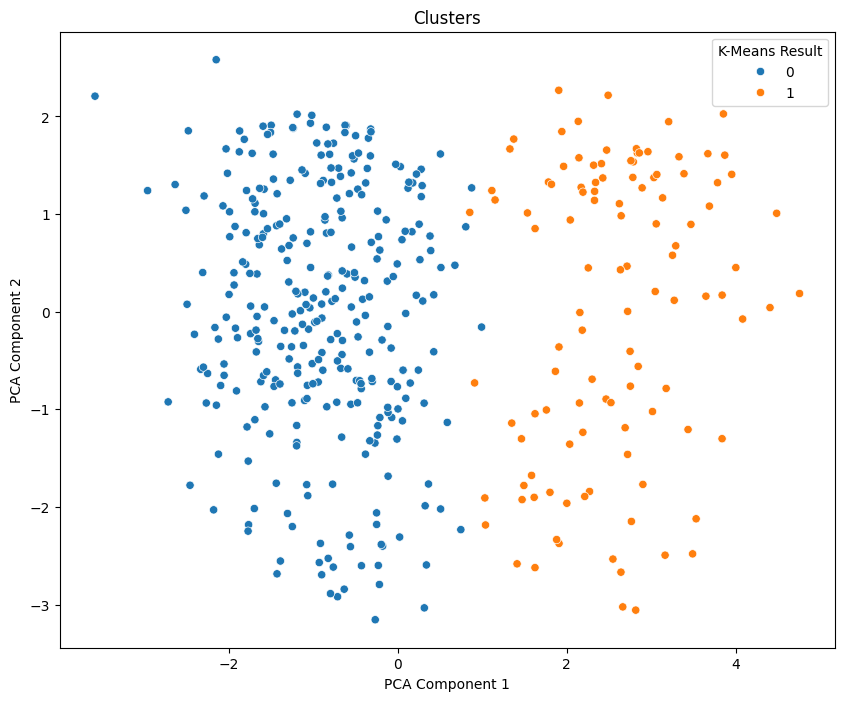

In [ ]:
if __name__ == '__main__':
  x_label = final_data_1['PCA Component 1']
  y_label = final_data_1['PCA Component 2']
  plt.figure(figsize=(10, 8))
  sns.scatterplot(x=x_label, y=y_label, hue=final_data_1['K-Means Result'])
  plt.title("Clusters")
  plt.show()

Let's apply K-Modes with `distance='hamming'` to group similar students using the three categorical features.

In [ ]:
if __name__ == '__main__':
  cat_data = activity_data[['Program', 'Residence', 'Year']].to_numpy()
  result = kmeans_clustering(cat_data, 2, distance='hamming')

  final_data_2 = activity_data[['Program', 'Residence', 'Year']].copy()
  final_data_2['K-Means Result'] = result['labels']
  display(final_data_2.head(10))

,Program,Residence,Year,K-Means Result
0,4,2,1,0
1,2,3,3,0
2,4,1,0,0
3,1,3,2,0
4,2,3,1,1
5,0,0,3,1
6,4,1,3,0
7,1,2,3,0
8,2,3,1,1
9,4,2,1,0


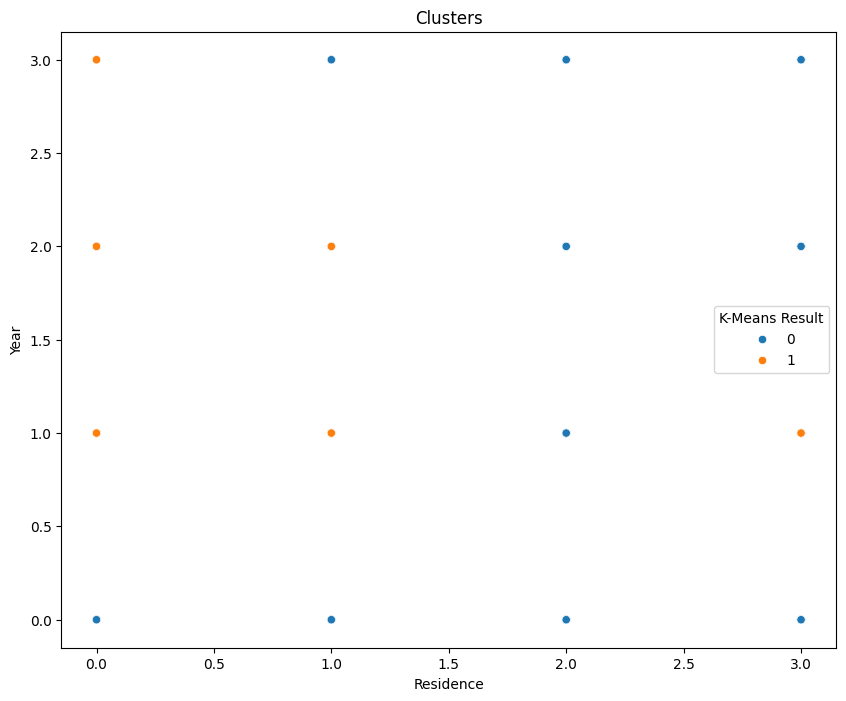

In [ ]:
if __name__ == '__main__':
  x_label = final_data_2['Residence']
  y_label = final_data_2['Year']
  plt.figure(figsize=(10, 8))
  sns.scatterplot(x=x_label, y=y_label, hue=final_data_2['K-Means Result'])
  plt.title("Clusters")
  plt.show()